C:\Users\SAMOL\AppData\Local\Temp\ipykernel_2788\9311621.py:30: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


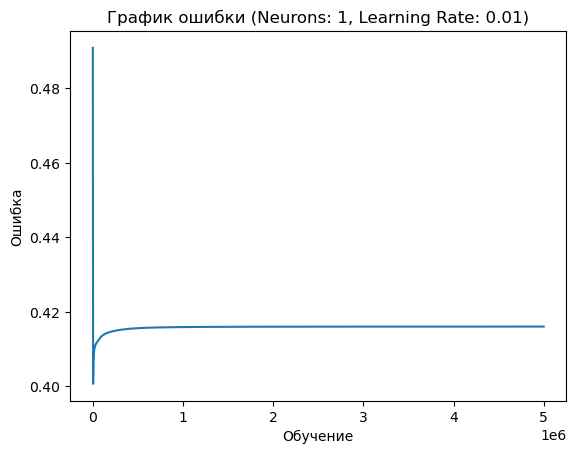

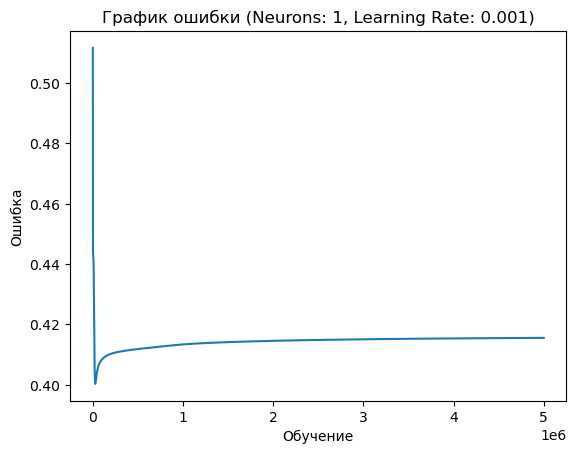

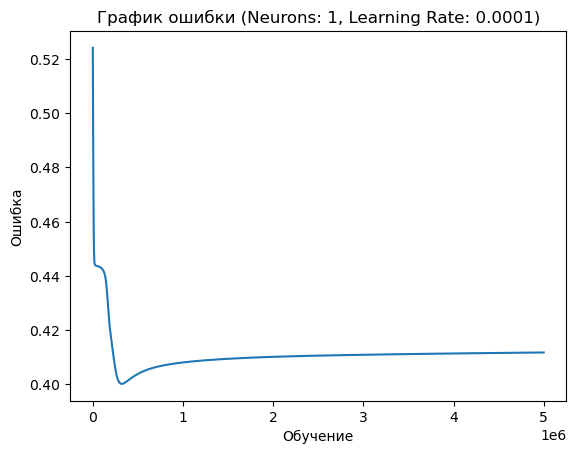

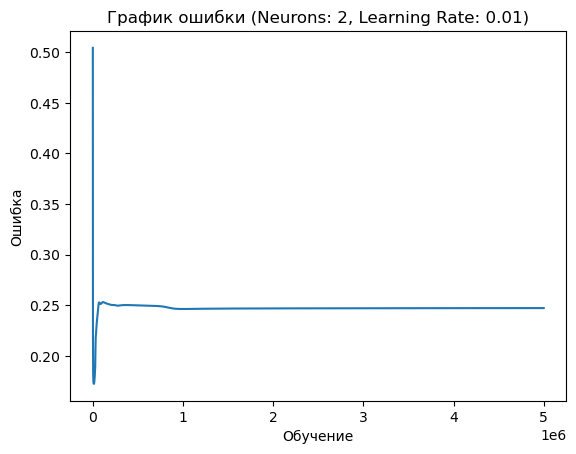

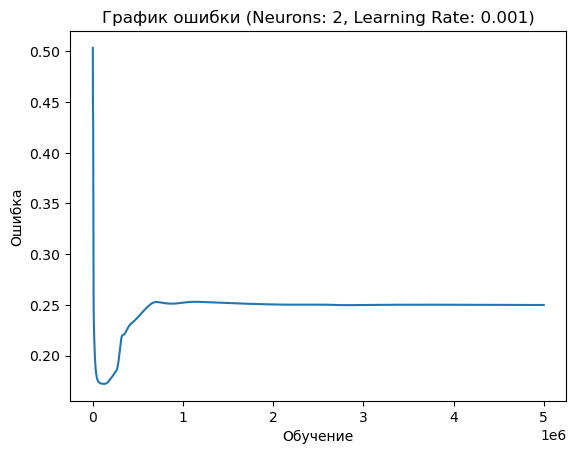

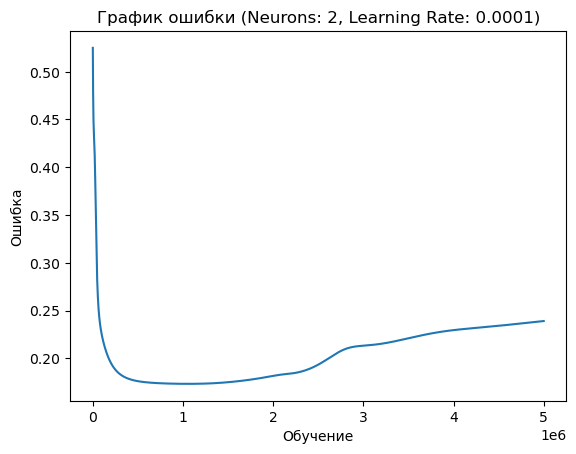

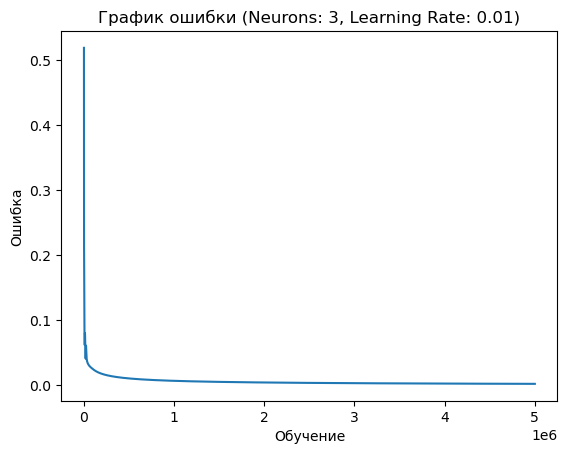

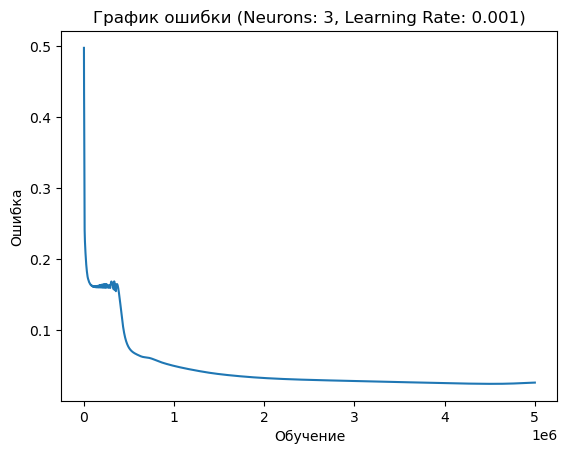

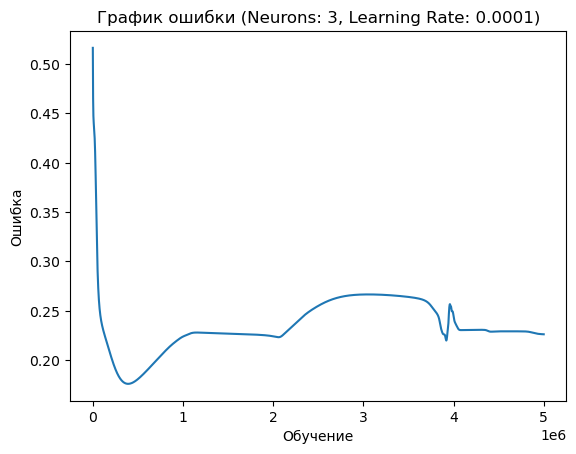

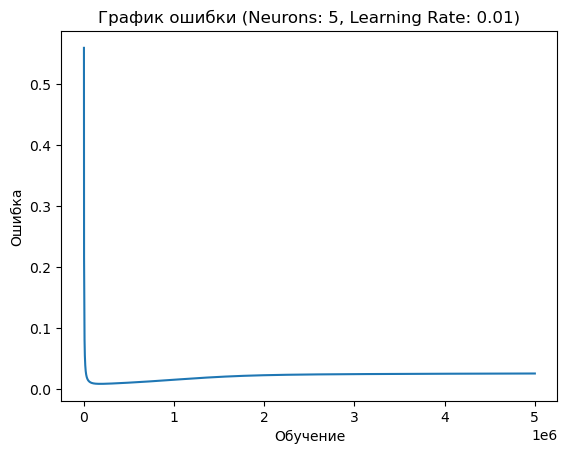

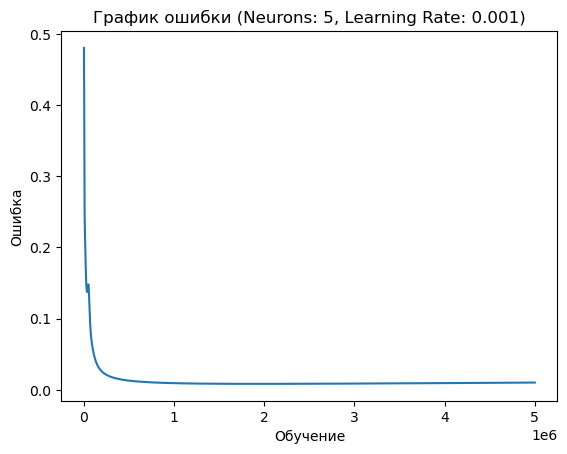

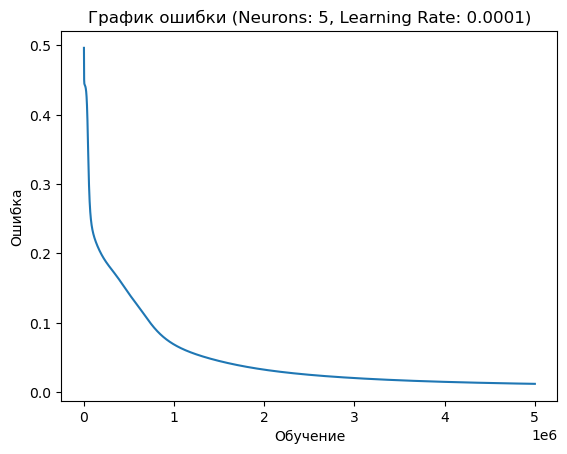

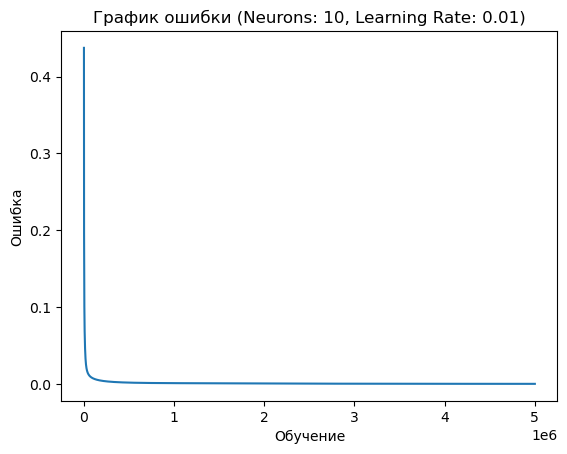

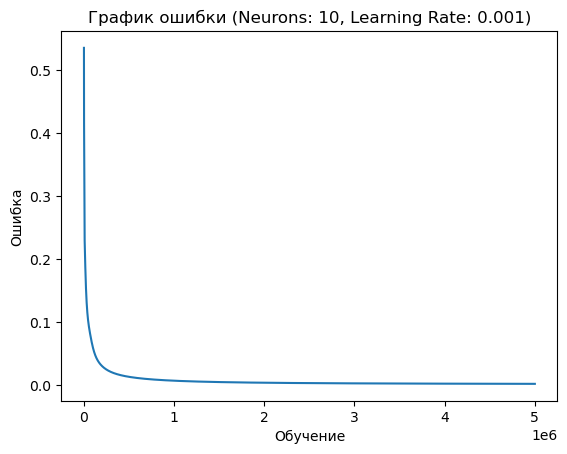

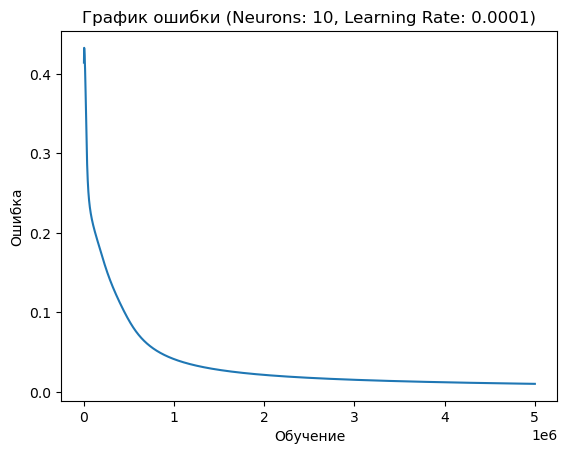

Лучшая точность нейронной сети:
Количество нейронов в скрытых слоях: 10
Скорость обучения: 0.01
Точность нейронной сети: 99.98 %


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split


def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)


iris_data = pd.read_csv("./Iris.csv")
#print(iris_data.head())

#g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")

iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.values)

columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.values
y = y.flatten()
y = to_one_hot(y)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

hidden_neurons = [1, 2, 3, 5, 10]  # список значений количества нейронов в скрытых слоях
learning_rates = [0.01, 0.001, 0.0001]  # список значений скоростей обучения

best_accuracy = 0  # переменная для хранения лучшей точности
best_neurons = 0  # переменная для хранения оптимального количества нейронов
best_learning_rate = 0  # переменная для хранения оптимальной скорости обучения

for neurons in hidden_neurons:
    for rate in learning_rates:
        w0 = 2*np.random.random((4, neurons)) - 1
        w1 = 2*np.random.random((neurons, 3)) - 1

        n = rate

        errors = []

        for i in range(5000000):

            layer0 = X_train
            layer1 = sigmoid(np.dot(layer0, w0))
            layer2 = sigmoid(np.dot(layer1, w1))
            
            layer2_error = y_train - layer2
            layer2_delta = layer2_error * sigmoid_deriv(layer2)

            layer1_error = layer2_delta.dot(w1.T)
            layer1_delta = layer1_error * sigmoid_deriv(layer1)

            w1 += layer1.T.dot(layer2_delta) * n
            w0 += layer0.T.dot(layer1_delta) * n

            error = np.mean(np.abs(layer2_error))
            errors.append(error)
            accuracy = (1 - error) * 100

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_neurons = neurons
            best_learning_rate = rate

        plt.plot(errors)
        plt.xlabel('Обучение')
        plt.ylabel('Ошибка')
        plt.title(f'График ошибки (Neurons: {neurons}, Learning Rate: {rate})')
        plt.show()

print("Лучшая точность нейронной сети:")
print("Количество нейронов в скрытых слоях:", best_neurons)
print("Скорость обучения:", best_learning_rate)
print("Точность нейронной сети:", round(best_accuracy, 2), "%")
